In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split

In [30]:
image_df='/kaggle/input/retina-blood-vessel/Data/train/image'
mask_df="/kaggle/input/retina-blood-vessel/Data/train/mask"

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from sklearn.model_selection import train_test_split

# Paths to image and mask directories
image_dir = '/kaggle/input/retina-blood-vessel/Data/train/image'
mask_dir = '/kaggle/input/retina-blood-vessel/Data/train/mask'

# Function to list files in a directory
def list_files(directory):
    return tf.io.gfile.glob(f"{directory}/*")

# List all image and mask files
image_paths = list_files(image_dir)
mask_paths = list_files(mask_dir)

# Function to load and preprocess images and masks
def load_and_preprocess_image(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [256, 256])
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    
    return image.numpy(), mask.numpy()

# Load all images and masks
images = []
masks = []

for img_path, mask_path in zip(image_paths, mask_paths):
    img, mask = load_and_preprocess_image(img_path, mask_path)
    images.append(img)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# Define a simple U-Net model for segmentation
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    
    u4 = UpSampling2D((2, 2))(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define and train the model
model = unet_model()
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Model loss:", loss)
print("Model accuracy:", accuracy)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 129s 15s/step - accuracy: 0.0018 - loss: -1610595.0000 - val_accuracy: 4.3161e-04 - val_loss: -246836528.0000
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 144s 16s/step - accuracy: 3.7205e-04 - loss: -5797380096.0000 - val_accuracy: 4.3161e-04 - val_loss: -229557665792.0000
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 124s 15s/step - accuracy: 3.6963e-04 - loss: -1478258982912.0000 - val_accuracy: 4.3161e-04 - val_loss: -30830481113088.0000
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 124s 15s/step - accuracy: 3.7328e-04 - loss: -110006829580288.0000 - val_accuracy: 4.3161e-04 - val_loss: -1433254208995328.0000
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 15s/step - accuracy: 3.6359e-04 - loss: -3714203428847616.0000 - val_accuracy: 4.3161e-04 - val_loss: -35344301638549504.0000
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 143s 15s/step - accuracy: 3.6973e-04 - loss: -74045193233367040.0000 - val_accuracy: 4.3161e-04 - val_loss: -548885172477493248.0000
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 

In [4]:
def convert_image_toarray(df):
    image=[]
    for i in os.listdir(df):
        data=os.path.join(df,i)
        cv_img=cv2.imread(data)
        image.append(cv_img)
    return image

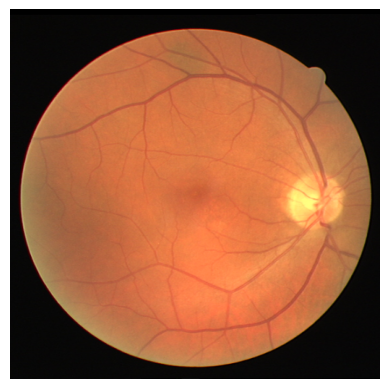

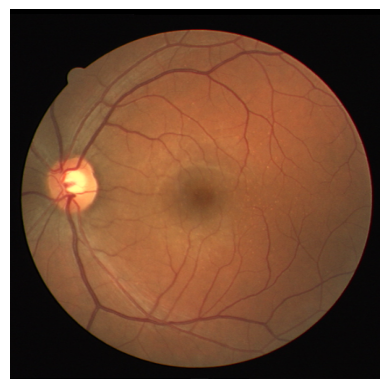

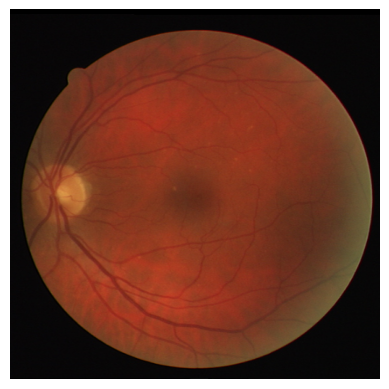

In [5]:
image=[]
for i in os.listdir(image_df):
    data=os.path.join(image_df,i)
    cv_img=cv2.imread(data)
    image.append(cv_img)

for img in image[:3]:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

In [6]:
image_df1=convert_image_toarray(image_df)
image_df1=np.array(image_df1)
mask_df1=convert_image_toarray(mask_df)
mask_df1=np.array(mask_df1)

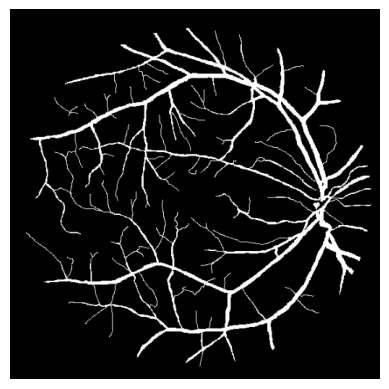

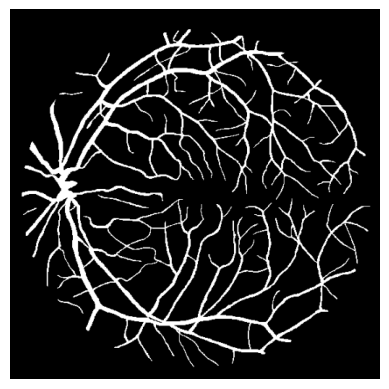

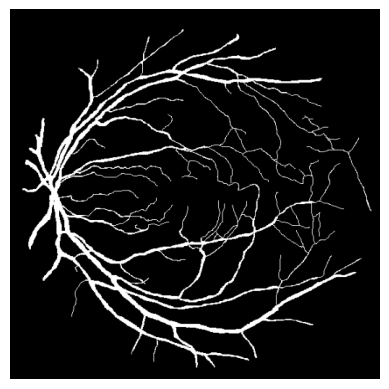

In [7]:
for img in mask_df1[:3]:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

In [8]:
X=image_df1
Y=mask_df1

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(64, 512, 512, 3)

# # Machine Learning

In [11]:
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,UpSampling2D,concatenate

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
import numpy as np

def unet_model(input_size=(512, 512, 3)):
    inputs = Input(input_size)
    # Downsampling
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    up6 = UpSampling2D((2, 2))(conv5)
    merge6 = concatenate([up6, conv4])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = UpSampling2D((2, 2))(conv6)
    merge7 = concatenate([up7, conv3])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = UpSampling2D((2, 2))(conv7)
    merge8 = concatenate([up8, conv2])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = UpSampling2D((2, 2))(conv8)
    merge9 = concatenate([up9, conv1])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    output = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs, output)
    return model

# Clear TensorFlow session
tf.keras.backend.clear_session()

# Rebuild and compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming Y_train has shape (batch_size, 512, 512, 3)
Y_train_single_channel = Y_train[..., 0:1]  # or use np.mean(Y_train, axis=-1, keepdims=True)




In [ ]:
# Train the model
model.fit(X_train, Y_train_single_channel, epochs=10, batch_size=160, validation_split=0.1)

In [16]:
def data_generator(X, y, batch_size=100):
    while True:
        for start in range(0, len(X), batch_size):
            end = min(start + batch_size, len(X))
            yield X[start:end], y[start:end]

# Example usage with a neural network model in Keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(512, 512, 3)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(data_generator(X_train, Y_train), steps_per_epoch=len(X_train) // 32, epochs=10)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 512, 512, 3), output.shape=(None, 512, 512, 1)

In [22]:
import tensorflow as tf

# Example file paths
image_paths = image_df
mask_paths = mask_df

def load_image(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    return image, mask

def preprocess(image, mask):
    image = tf.image.resize(image, [256, 256])
    mask = tf.image.resize(mask, [256, 256])
    return image, mask

def create_dataset(image_paths, mask_paths, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

batch_size = 8
dataset = create_dataset(image_paths, mask_paths, batch_size)


ValueError: Unbatching a tensor is only supported for rank >= 1

In [25]:
import tensorflow as tf
import pandas as pd

# Load data using pandas
image_paths = pd.read_csv(image_df)['image_path'].tolist()
mask_paths = pd.read_csv(mask_df)['mask_path'].tolist()

# Validate that the lists are not empty and have the same length
if len(image_paths) == 0 or len(mask_paths) == 0:
    raise ValueError("Image paths or mask paths list is empty.")
if len(image_paths) != len(mask_paths):
    raise ValueError("Image paths and mask paths lists must have the same length.")

def load_image(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    return image, mask

def preprocess(image, mask):
    image = tf.image.resize(image, [256, 256])
    mask = tf.image.resize(mask, [256, 256])
    return image, mask

def create_dataset(image_paths, mask_paths, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

batch_size = 8
dataset = create_dataset(image_paths, mask_paths, batch_size)

# Example usage
for images, masks in dataset.take(1):
    print(images.shape, masks.shape)

    

IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/retina-blood-vessel/Data/train/image'

In [27]:
import tensorflow as tf
import pandas as pd

# Provide the correct paths to your CSV files
image_df_path = image_df
mask_df_path = mask_df

# Load data using pandas
image_df = pd.read_csv(image_df_path)
mask_df = pd.read_csv(mask_df_path)

image_paths = image_df['image_path'].tolist()
mask_paths = mask_df['mask_path'].tolist()

# Validate that the lists are not empty and have the same length
if len(image_paths) == 0 or len(mask_paths) == 0:
    raise ValueError("Image paths or mask paths list is empty.")
if len(image_paths) != len(mask_paths):
    raise ValueError("Image paths and mask paths lists must have the same length.")

def load_image(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    return image, mask

def preprocess(image, mask):
    image = tf.image.resize(image, [256, 256])
    mask = tf.image.resize(mask, [256, 256])
    return image, mask

def create_dataset(image_paths, mask_paths, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

batch_size = 8
dataset = create_dataset(image_paths, mask_paths, batch_size)

# Example usage
for images, masks in dataset.take(1):
    print(images.shape, masks.shape)

    

IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/retina-blood-vessel/Data/train/image'

# # Quantum Machine Learning

In [41]:
!pip install cirq tensorflow_quantum

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_quantum as tfq
import sympy
qubits=[cirq.GridQubit(0,i) for i  in range(len(X_train)]
def create_circuit(qubit):
    for i,values in enumerate(X_train):
        circuit=cirq.Circuit([
            cirq.X(qubit[i])
    ])
    return circuit
def create_model():
    for i,values in enumerate(X_train):
        circuit=cirq.Circuit([
            cirq.RX(qubit[i])
        ])
    read_out_operator=[cirq.Z(qubit) for qubit in qubits]
    input1=Input(shape=(),dtypes=tf.dtypes.String)
    layer=tfq.layers.POC(cirucit,read_out_operator)(input1)
    
    return Model(inputs=input1,output=layer)
circuit,qubit=create_circuit(X_train)
tf.convert_to_tensor(create_model)
tf.reduce_mean(X_train)



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (223753326.py, line 6)